In [45]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [46]:
# Get the data
df = pd.read_csv("Datafil.csv")

# 1 Warm-up
The following tasks are designed to familiarize you with the dataset and prepare the data for use when building your predictive models.

### (a) 
All scores in the dataframe are currently numbers between 0 and 10. Normalize these values in the dataframe so that they range between 0 and 1.


In [47]:
def normalize_scores(df):
    # Normalize scores (from 6th column onwards)
    for col in df.columns[5:]:
        df[col] = df[col].apply(lambda x: x/10 if x == x else x)  # handle NaN values
    print(df)

In [48]:
normalize_scores(df)

           id      location  month  year        comp  heat  run 1  run 2  \
0      Berger  jacksonville      7  2022  prelim men   0.1   0.50   0.11   
1        Papa  jacksonville      7  2022  prelim men   0.1   0.37   0.70   
2     Pudwill  jacksonville      7  2022  prelim men   0.1   0.20   0.13   
3      Shirai  jacksonville      7  2022  prelim men   0.1   0.79   0.70   
4        Mota  jacksonville      7  2022  prelim men   0.1   0.38   0.40   
..        ...           ...    ...   ...         ...   ...    ...    ...   
92      Hoban     las vegas     10  2022   final men   0.1   0.62   0.88   
93    Hoefler     las vegas     10  2022   final men   0.1   0.84   0.57   
94      Eaton     las vegas     10  2022   final men   0.1   0.69   0.72   
95     Joslin     las vegas     10  2022   final men   0.1   0.68   0.83   
96  Ribeiro G     las vegas     10  2022   final men   0.1   0.85   0.30   

    trick 1  trick 2  trick 3  trick 4  trick 5  trick 6  
0      0.70     0.00     0.7

### (b) 
Create a histogram for all trick scores for tricks 1-4. 
- What do you observe? 
- Is there a particular value that appears more often than the others? 
- If so, how does this value compare to the others?

In [49]:
# b) here i create a histogram fr normalized data
def plot_histograms(datafile):
    # List of tricks
    tricks = ["trick 1", "trick 2", "trick 3", "trick 4"]

    # Plot histograms for each trick
    for idx, trick in enumerate(tricks, 1):
        plt.subplot(2, 2, idx)  # 2x2 grid of histograms
        plt.hist(df[trick].dropna(), bins=20, alpha=0.7, color='blue')  # dropna() ensures NaN values are ignored
        plt.title(f"Histogram of {trick}")
        plt.xlabel("Score")
        plt.ylabel("Frequency")

    # Adjust layout to prevent overlaps and show the plot
    plt.tight_layout()
    plt.show()

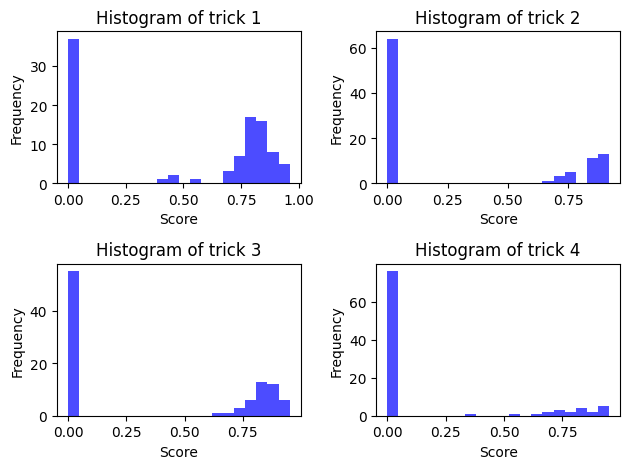

In [50]:
plot_histograms(df)

*From our observations, the most common score for each trick is zero, by a significant margin. The majority of other scores fall within the 0.6 to 0.9 range, with a noticeable lack of scores between 0 and 0.6. This pattern suggests that contestants tend to attempt more challenging tricks, which typically result in either failure (yielding a score of zero) or a relatively high score. This behavior indicates a tendency to bypass tricks of easy to medium difficulty.*

### (c)
For each trick (1-4), create a new column named 'make i' for \(i=1,2,3,4\). The value of 'make i' in a given row should be 1 if the skateboarder successfully landed trick \(i\) and 0 otherwise.

In [51]:
def add_make_columns(df):
    # Loop through each trick column
    for i in range(1, 5):
        trick_column = f"trick {i}"
        
        # Assuming a trick is executed if its score > 0
        df[f"make {i}"] = df[trick_column].apply(lambda x: 1 if x > 0 else 0)
    
    print(df)

In [52]:
add_make_columns(df)

           id      location  month  year        comp  heat  run 1  run 2  \
0      Berger  jacksonville      7  2022  prelim men   0.1   0.50   0.11   
1        Papa  jacksonville      7  2022  prelim men   0.1   0.37   0.70   
2     Pudwill  jacksonville      7  2022  prelim men   0.1   0.20   0.13   
3      Shirai  jacksonville      7  2022  prelim men   0.1   0.79   0.70   
4        Mota  jacksonville      7  2022  prelim men   0.1   0.38   0.40   
..        ...           ...    ...   ...         ...   ...    ...    ...   
92      Hoban     las vegas     10  2022   final men   0.1   0.62   0.88   
93    Hoefler     las vegas     10  2022   final men   0.1   0.84   0.57   
94      Eaton     las vegas     10  2022   final men   0.1   0.69   0.72   
95     Joslin     las vegas     10  2022   final men   0.1   0.68   0.83   
96  Ribeiro G     las vegas     10  2022   final men   0.1   0.85   0.30   

    trick 1  trick 2  trick 3  trick 4  trick 5  trick 6  make 1  make 2  \
0      0.70

### (d)
For each skateboarder, estimate the probability that a trick receives a score greater than 0.6, given that the skateboarder successfully lands the trick. What is the probability that the skateboarder fails to land a particular trick? What observations can you make? Relate your findings to your observations in part (b).

In [53]:
# d) Given that they make a trick estimate the probability of them getting a score that's higher than 0.6
def estimate_probabilities(df):
    results = []
    for index, row in df.iterrows():
        tricks = [f"trick {i}" for i in range(1, 5)]
        
        successful_tricks = sum(1 for trick in tricks if row[trick] > 0)
        more_than = sum(1 for trick in tricks if row[trick] >= 0.6)
        
        prob_success = more_than / successful_tricks if successful_tricks > 0 else 0
        prob_failure = 1 - prob_success
        
        results.append((index, prob_success, prob_failure))
    
    for index, success, failure in results:
        print(f"Skateboardåkare {index+1}: P(success) = {success:.2f}, P(failure) = {failure:.2f}")
    
    print(df)

In [54]:
estimate_probabilities(df)

Skateboardåkare 1: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 2: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 3: P(success) = 0.00, P(failure) = 1.00
Skateboardåkare 4: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 5: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 6: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 7: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 8: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 9: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 10: P(success) = 0.00, P(failure) = 1.00
Skateboardåkare 11: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 12: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 13: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 14: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 15: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 16: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 17: P(success) = 1.00, P(failure) = 0.00
Skateboardåkare 18: P(success) = 1.00, P